In [1]:
# 04_customer_segmentation.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load cleaned data
df = pd.read_csv('../data/customer_behavior_clean.csv')

In [3]:
# Preparing and scaling df
cluster_df = df[['age','annual_income','spending_score']]
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_df)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

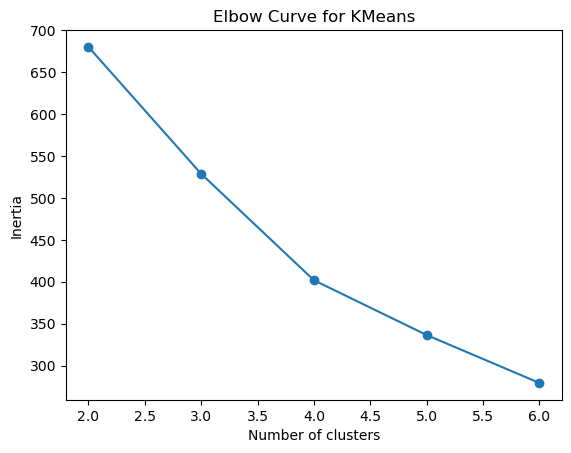

In [4]:
# Elbow method to pick K
inertias = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertias.append(km.inertia_)

plt.plot(range(2,7), inertias, marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


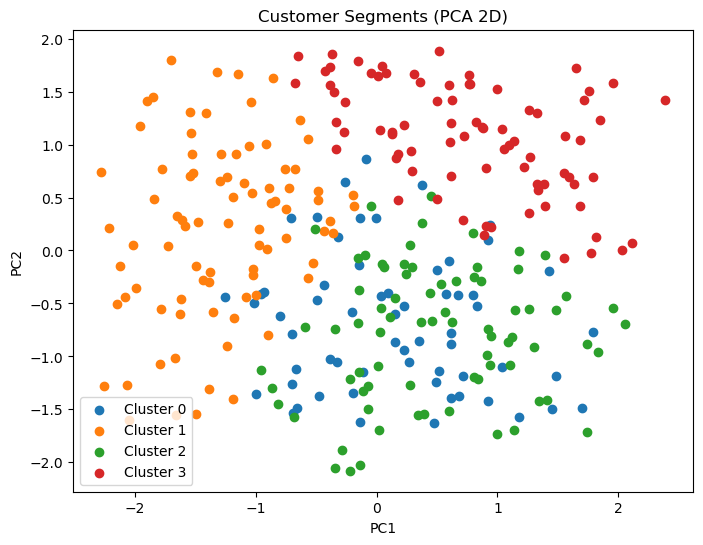

Cluster counts:
 1    84
3    79
2    76
0    61
Name: count, dtype: int64


In [8]:
# Fit KMeans with chosen K (4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled)

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled)

# Plot the clusters using PCA components
plt.figure(figsize=(8,6))
for cluster_num in np.unique(labels):
    plt.scatter(pca_result[labels==cluster_num,0],
                pca_result[labels==cluster_num,1], 
                label=f'Cluster {cluster_num}')
plt.title('Customer Segments (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Print the number of samples in each cluster
print("Cluster counts:\n", pd.Series(labels).value_counts())


In [ ]:
"""
4. Customer Segmentation – Professional Explanation
This notebook focuses on segmenting customers using KMeans clustering and visualizing the segments with PCA.
Data Preparation:
    •	Selected features: age, annual_income, spending_score.
    •	Features were standardized using StandardScaler to ensure equal weighting.
Clustering Analysis:
    •	The elbow method was used to determine the optimal number of clusters, suggesting K = 4.
    •	KMeans clustering assigned each customer to one of four segments.
Visualization:
    •	PCA reduced the three features to two principal components for 2D plotting.
    •	Clusters were visualized, showing clear separation among customer segments.
Cluster Insights:
    •	Cluster counts revealed the distribution of customers across segments.
    •	This segmentation enables targeted marketing and personalized retention strategies based on income and spending behavior.

"""